In [8]:
import importlib
import clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
importlib.reload(clustering)
file_name = "data/dataset.csv"
clusterator = clustering.Clusterator(file_name=file_name)

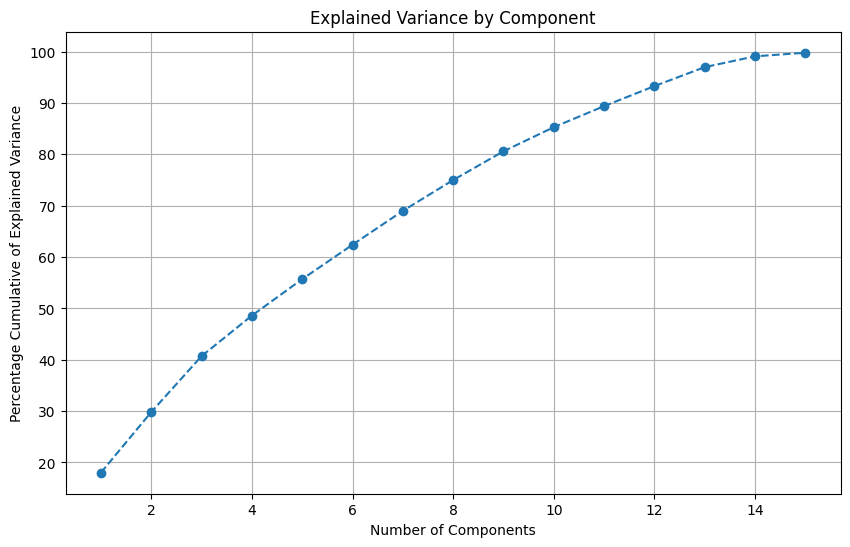

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = clusterator.results_df
num_cols = data.select_dtypes(include=[np.number]).columns
data = scaler.fit_transform(data[num_cols])
data = pd.DataFrame(data, columns=num_cols)
data = data.drop(columns=["cluster"])
pca = PCA()
pca.fit(data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()


Values of column price:
   cluster   min     max        mean
0        0  10.0   200.0   81.379282
1        1  20.0  7314.0  152.975808
2        2  44.0  9994.0  434.487599
3        3  17.0   856.0  135.228214
4        4  66.0  7590.0  232.417989
Values of column minimum_nights:
   cluster  min   max       mean
0        0    1   150  27.709844
1        1    1  1250  37.346615
2        2    1   365  25.341037
3        3    1   100  25.427120
4        4    1   200  24.111111
Values of column calculated_host_listings_count:
   cluster  min  max        mean
0        0    1   56    3.664117
1        1    1   34    2.857085
2        2    1  259    4.567080
3        3    3  713  129.783509
4        4    1   52    2.705346
Values of column popularity:
   cluster       min         max       mean
0        0  0.694444  100.000000  10.401842
1        1  0.000000   20.000000   0.806459
2        2  0.000000   47.945205   6.549749
3        3  0.000000   40.000000   6.449260
4        4  0.000000   80.0

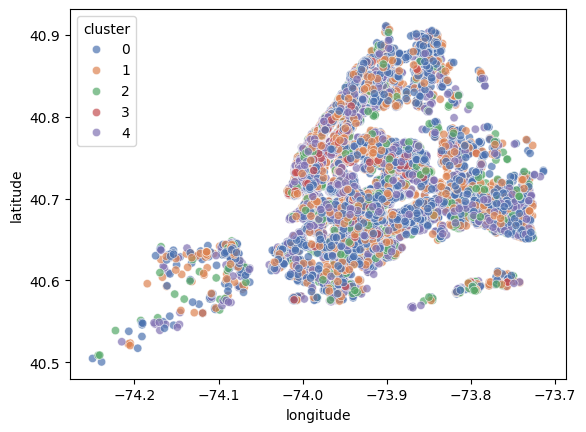

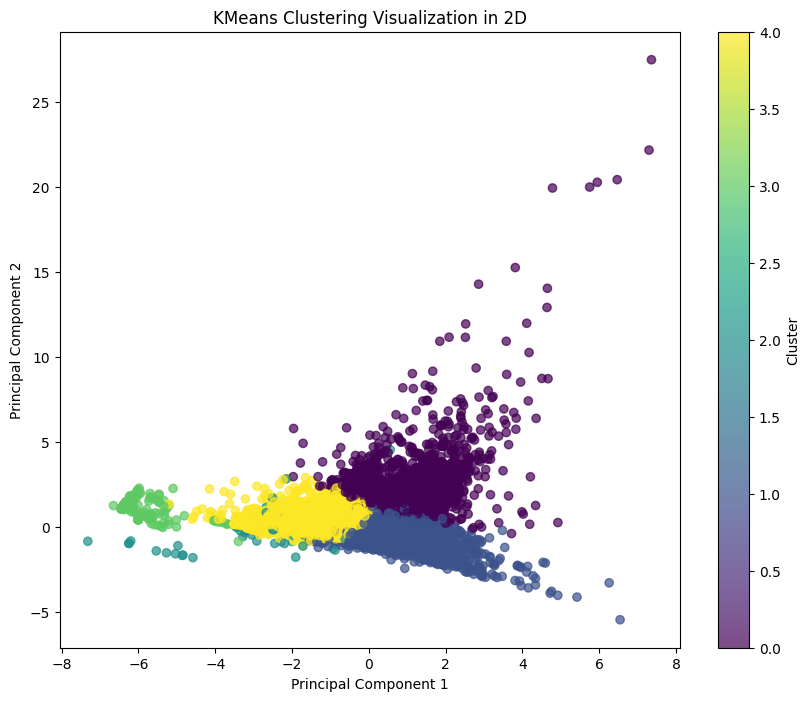

In [17]:
columns = ['price', 'minimum_nights', 'calculated_host_listings_count', 'popularity', 'rating', 'beds']
model = KMeans(n_clusters=5)
clusterator.clusterize(columns=columns, model=model)
clusterator.plot(show_values=columns)
clusterator.pca_plot(model = model, n_components=5, columns=columns)

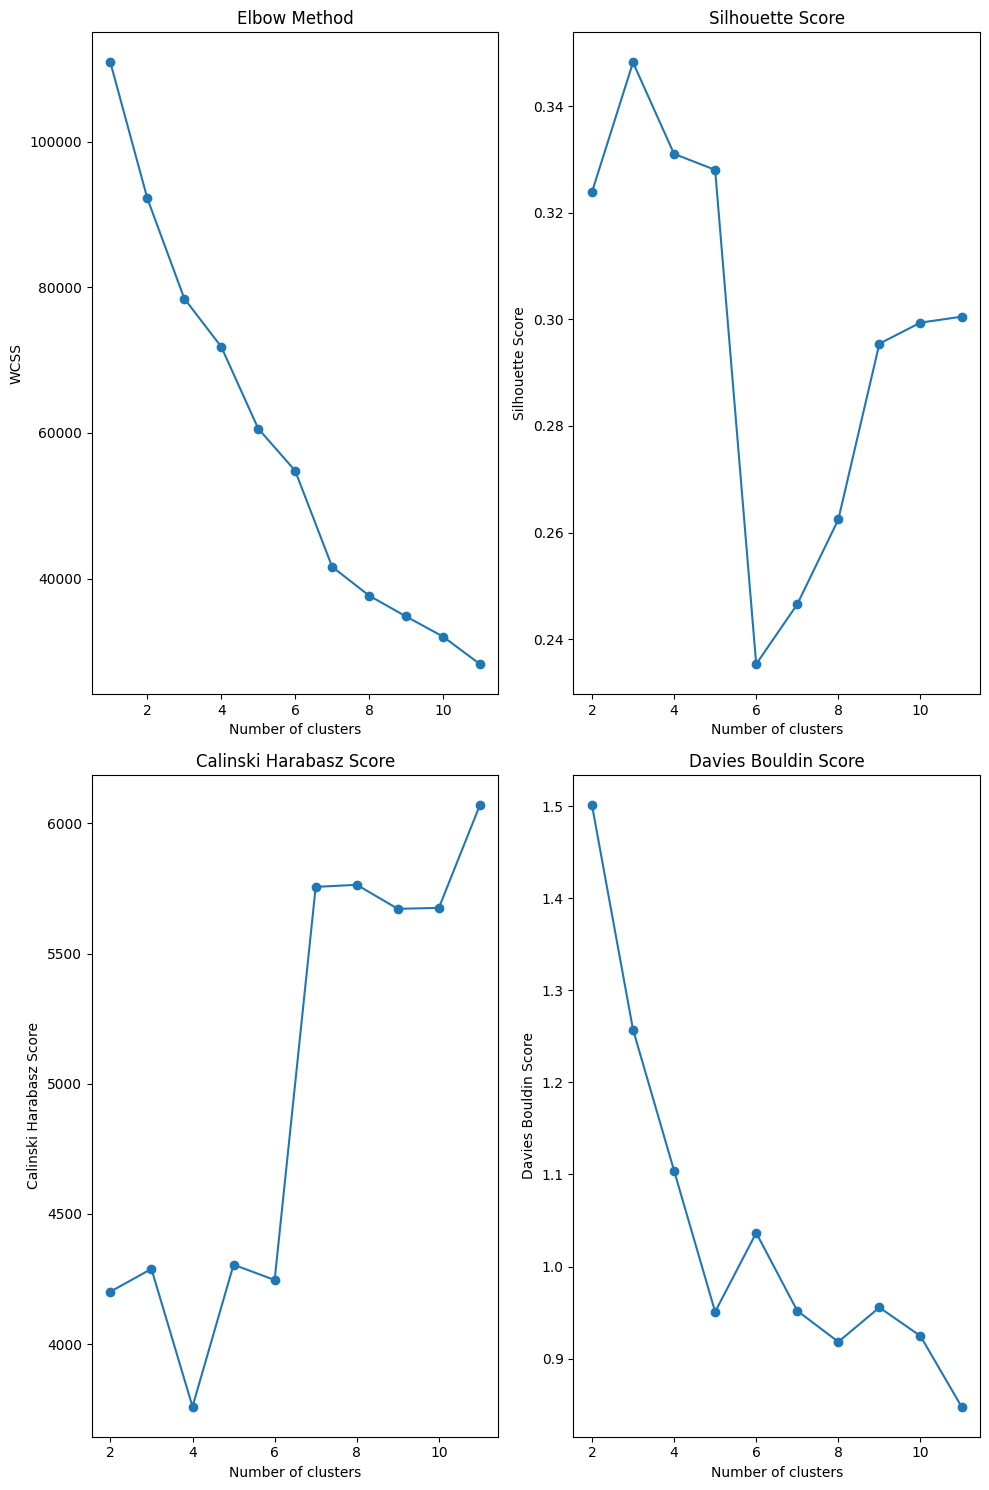

In [18]:
clusterator.plot_metric_scores(n_components=5, columns=columns)